In [1]:
'''
Comp551: Assignment 1: Question 2

@author: Anand Kamat
@id: 260773313
'''
#Importing Packages
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.pylab
%matplotlib inline


In [2]:
################ Question 2: Model Selection ####################################################

#Datasets
X_train = []
X_train_label = []
X_valid = []
X_valid_label = []
X_test = []
X_test_label = []

In [3]:
####
#    Loading Datasets
####

#Loading training data
with open('./Datasets/Dataset_2_train.csv', 'rb') as csv_file:
    raw_train = csv.reader(csv_file, delimiter = ',')
    for data in raw_train:
        X_train.append(float(data[0]))
        X_train_label.append(float(data[1]))
    del(data)    
     
#Loading validation data        
with open('./Datasets/Dataset_2_valid.csv', 'rb') as csv_file2:
    raw_valid = csv.reader(csv_file2, delimiter = ',')
    for data in raw_valid:
        X_valid.append(float(data[0]))
        X_valid_label.append(float(data[1]))
    del(data)
   
#Loading test data     
with open('./Datasets/Dataset_2_test.csv', 'rb') as csv_file3:
    raw_test = csv.reader(csv_file3, delimiter = ',')
    for data in raw_test:
        X_test.append(float(data[0]))
        X_test_label.append(float(data[1]))
    del(data)


In [12]:
param1, param2 = 0.0, 0.0
SE_train, SE_valid = 0,0
learning_rate = 1e-6
epoch_list_train, epoch_list_valid,  MSE_train_list, MSE_valid_list = [],[],[],[]

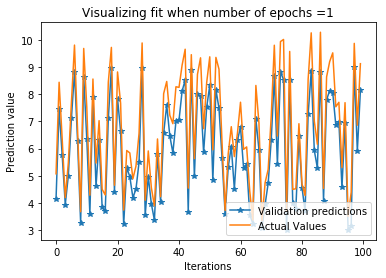

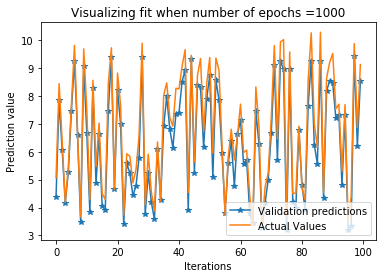

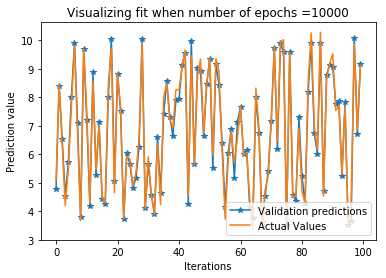

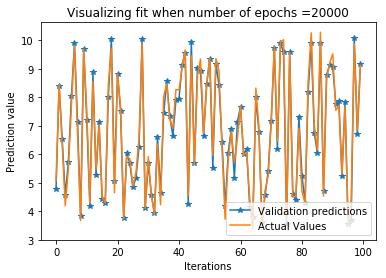

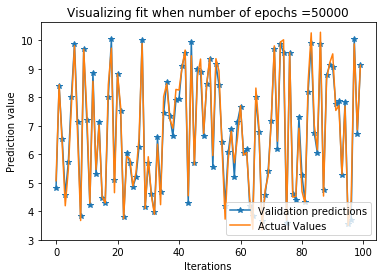

In [9]:
#Performing Online Schotastic Gradient Descent on Training Set
for epoch in range(50000):
    SE_train = 0.0
    for i in range(0,len(X_train)):
        param1 = (param1 - learning_rate*((param1 + param2*X_train[i]) - X_train_label[i]))
        param2 = param2 - learning_rate*((param1 + param2*X_train[i]) - X_train_label[i])* X_train[i]
        
        Y_train_pred = param1 + param2*X_train[i]
        Y_train_actual = X_train_label[i]
        SE_train += ((Y_train_pred - Y_train_actual)**2)
    
    MSE_train = (SE_train)/(len(X_train))
    MSE_train_list.append(MSE_train)
    epoch_list_train.append(epoch + 1)
    epoch_string_train = "TRAINING: Epoch:" + str(epoch+1) + " MSE: " + str(MSE_train)
    #print(epoch_string_train)
    
    SE_valid = 0.0
    visualize_pred = []
    for i in range(0,len(X_valid)):
        Y_valid_pred = param1 + param2*X_valid[i]
        Y_valid_actual = X_valid_label[i]
        visualize_pred.append(Y_valid_pred)
        SE_valid += ((Y_valid_pred - Y_valid_actual)**2)
    
    if(epoch ==0 or epoch ==999 or epoch==9999 or epoch== 19999 or epoch==49999):
        #Plotting the graph for validation data
        plt.plot(visualize_pred, marker='*', label = "Validation predictions")
        plt.plot(X_valid_label, label = "Actual Values")
        plt.legend(loc = 4)
        plt.xlabel('Iterations')
        plt.ylabel('X Value')
        title_str = "Visualizing fit when number of epochs =" + str(epoch+1) 
        plt.title(title_str)
        plt.show()
    
    MSE_valid = (SE_valid)/(len(X_valid))
    MSE_valid_list.append(MSE_valid)
    epoch_list_valid.append(epoch + 1)
    epoch_string_valid = "VALIDATION: Epoch:" + str(epoch+1) + " MSE: " + str(MSE_valid)
    #print(epoch_string_valid)   

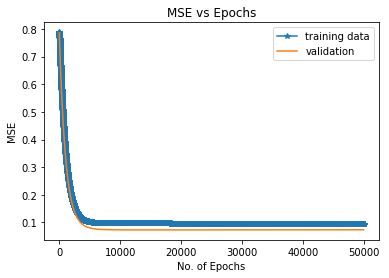

In [10]:
plt.plot(epoch_list_train, MSE_train_list, marker='*', label = "training data")
plt.xlabel('No. of Epochs')
plt.ylabel('MSE')
plt.title('MSE vs Epochs')
#plt.show()

plt.plot(epoch_list_valid, MSE_valid_list, label = "validation")
#plt.xlabel('No. of Epochs')
#plt.ylabel('Testing MSE')
#plt.title('Testing MSE vs Epochs')
plt.legend(loc = 1)

plt.show()

In [11]:
SE_test = 0.0
for i in range(0,len(X_test)):
    Y_test_pred = param1 + param2*X_test[i]
    Y_test_actual = X_test_label[i]
    SE_test += ((Y_test_pred - Y_test_actual)**2)

MSE_test = (SE_valid)/(len(X_valid))
epoch_string_test = "Testing MSE: " + str(MSE_test)
print(epoch_string_test)   

Testing MSE: 0.0734708365076
